In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df.head(10)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [3]:
#Displays the Bottom 10 Records.
df.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [4]:
#Datatype for each attribute
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.shape #The Attribute returns the count of Rows and Columns
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 3755
Number of Columns: 11


In [6]:
# The method shows the number of entries, column names, non-null values,and data types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
#Checking If the dataset contains any Null Values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# It provides summary statistics (count, mean, std, min, max, etc.) for numerical columns in the DataFrame.
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [9]:
# Check for duplicate rows
df.duplicated().sum()

1171

In [47]:
#Dropping duplicates for data accuracy and eliminating redundancy
df = df.drop_duplicates()

In [59]:
#After dropping the duplicates the sum of duplicates
df.duplicated().sum()

0

In [60]:
# Creates a new CSV file after cleaning the data
df.to_csv('cleaned_data.csv', index=False)

In [58]:
#To check if the file exists
import os
os.path.exists('cleaned_data.csv')

True

In [14]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [15]:
# Shows the top 10 most frequent job titles in the dataset along with their counts.
df['job_title'].value_counts().head(10).reset_index()

,job_title,count
0,Data Engineer,598
1,Data Scientist,538
2,Data Analyst,396
3,Machine Learning Engineer,206
4,Analytics Engineer,91
5,Research Scientist,65
6,Data Architect,64
7,Data Science Manager,52
8,ML Engineer,34
9,Research Engineer,33


In [16]:
#Counts the number of distribution of jobs across company sizes(S, M, L).
df['company_size'].value_counts()

company_size
M    2028
L     409
S     147
Name: count, dtype: int64

In [17]:
#Finding the Average Salary for each Job title.
#Groups the data by job title and finds the average salary rounded to 2 decimal places in descending order.
df.groupby('job_title')['salary'].mean().round(2).reset_index().sort_values(by='salary',ascending=False)

,job_title,salary
60,Head of Machine Learning,6000000.00
82,Principal Data Architect,3000000.00
65,Lead Machine Learning Engineer,2548666.67
64,Lead Data Scientist,928485.33
28,Data Analytics Lead,922500.00
...,...,...
61,Insight Analyst,38500.00
22,Compliance Data Analyst,30000.00
9,Autonomous Vehicle Technician,26277.50
91,Staff Data Analyst,15000.00


In [18]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [19]:
# Group by employment type, calculate average salary, and rename columns for cleaner DataFrame output.
df.groupby('employment_type')['salary'].mean().reset_index().rename(columns={
    'employment_type': 'type',
    'salary': 'average_salary'
}).sort_values(by='average_salary', ascending=False).round(2)

,type,average_salary
1,FL,288755.50
2,FT,211309.34
0,CT,113300.00
3,PT,79910.82


In [20]:
# Reduced dataset size by eliminating 1171 duplicate job records.  
# Row count reduced from 3755 to 2584 while retaining all 11 columns.
df.shape
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 2584
Number of Columns: 11


In [21]:
#Job roles which are Full time converts True to 1 and False to 0
FT_count = (df['employment_type'] == 'FT').sum()
print("Full-Time job roles:", FT_count)

Full-Time job roles: 2547


In [22]:
#Which are the top 5 countries with the most employees?
top_5_countries = df['employee_residence'].value_counts().head(5)
print(top_5_countries)

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
Name: count, dtype: int64


In [23]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [24]:
#How many remote jobs are there (remote_ratio == 100)
remote_jobs = df[df['remote_ratio']== 100].shape[0]
print('Count of Remote Jobs:',remote_jobs)

Count of Remote Jobs: 1211


In [25]:
#Displays the highest paid fully remote job in usd which is for the Prinicipal data scientist
df[df['remote_ratio'] == 100].sort_values(by='salary_in_usd', ascending=False).head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S


In [27]:
#Top 5 Rows
df[df['remote_ratio']== 100].head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [28]:
#How many people are working Remote jobs in each country
#Filters the DataFrame for remote jobs, groups by 'employee_residence' and counts remote jobs, 
#Sorts by job count in descending order, and selects only relevant columns without displaying the index.
remote_by_country = df[df['remote_ratio'] == 100].groupby('employee_residence').size().reset_index(name='remote_jobs').sort_values('remote_jobs', ascending=False).head(10)
remote_by_country = remote_by_country[['employee_residence', 'remote_jobs']]
print(remote_by_country.to_string(index=False))  # Hide the index in the output

employee_residence  remote_jobs
                US          888
                GB           51
                CA           43
                IN           38
                ES           23
                DE           17
                BR           16
                FR           14
                GR           10
                MX            9


In [29]:
#Finding the most common job title in each company size category
#Group data by company size and find the most frequent job title in each group.
most_common = df.groupby('company_size')['job_title'].agg(lambda x: x.mode()[0])
print(most_common)

company_size
L    Data Scientist
M     Data Engineer
S    Data Scientist
Name: job_title, dtype: object


In [30]:
#Displaying the details of Data Scientists whose salary is greater than 80,000.
Data_scientist = df[(df['job_title'] == 'Data Scientist') & (df['salary'] > 80000)]
Data_scientist = Data_scientist[['job_title','experience_level','salary']]
Data_scientist.reset_index(drop=True,inplace=True)
print(Data_scientist)

          job_title experience_level  salary
0    Data Scientist               SE  175000
1    Data Scientist               SE  120000
2    Data Scientist               SE  219000
3    Data Scientist               SE  141000
4    Data Scientist               SE  147100
..              ...              ...     ...
434  Data Scientist               MI  118000
435  Data Scientist               MI  138350
436  Data Scientist               MI  160000
437  Data Scientist               SE  412000
438  Data Scientist               EN  105000

[439 rows x 3 columns]


In [31]:
#The highest salary at each experience level.
#reset_index converts the series into a dataframe then rename is applied to it
highest_salary_per_level = df.groupby('experience_level')['salary'].max().reset_index()
highest_salary_per_level.rename(columns={'salary': 'Highest Salary'}, inplace=True)
print(highest_salary_per_level)

  experience_level  Highest Salary
0               EN         6600000
1               EX         6000000
2               MI        30400000
3               SE         7500000


In [32]:
#Count of employees at each experience level.
Count_of_Employees = df['experience_level'].value_counts()
print(Count_of_Employees)

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64


In [33]:
#The number of people working in the field of data increased from 76 in 2020 to 1,785 in 2023
#showing a significant growth over the years.
df['work_year'].value_counts().reset_index()

,work_year,count
0,2023,1156
1,2022,1125
2,2021,228
3,2020,75


In [34]:
#the top 10 most common salary currencies in the dataset.
df['salary_currency'].value_counts().head(10)

salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
Name: count, dtype: int64

In [35]:
#The regions having employees paid in USD and their respective salaries.
usd_salary_residence = df[df['salary_currency'] == 'USD'][['employee_residence', 'salary_currency','salary_in_usd']]
print(usd_salary_residence)

     employee_residence salary_currency  salary_in_usd
1                    US             USD          30000
2                    US             USD          25500
3                    CA             USD         175000
4                    CA             USD         120000
5                    US             USD         222200
...                 ...             ...            ...
3749                 US             USD         165000
3750                 US             USD         412000
3751                 US             USD         151000
3752                 US             USD         105000
3753                 US             USD         100000

[2107 rows x 3 columns]


In [36]:
#Fetching the three columns
df[['experience_level', 'salary','job_title']]

,experience_level,salary,job_title
0,SE,80000,Principal Data Scientist
1,MI,30000,ML Engineer
2,MI,25500,ML Engineer
3,SE,175000,Data Scientist
4,SE,120000,Data Scientist
...,...,...,...
3750,SE,412000,Data Scientist
3751,MI,151000,Principal Data Scientist
3752,EN,105000,Data Scientist
3753,EN,100000,Business Data Analyst


In [37]:
#Highest salary for a Data science Manager
salary = df[df['job_title'] == 'Data Science Manager']['salary'].max()
print("The Highest salary for a Data Science Manager is:",salary )

The Highest salary for a Data Science Manager is: 7000000


In [38]:
#Finding the lowest salary for a Business Data Analyst
salary = df[df['job_title'] == 'Business Data Analyst']['salary'].min()
print("The Lowest salary for a Business Data Analyst is:",salary )

The Lowest salary for a Business Data Analyst is: 12000


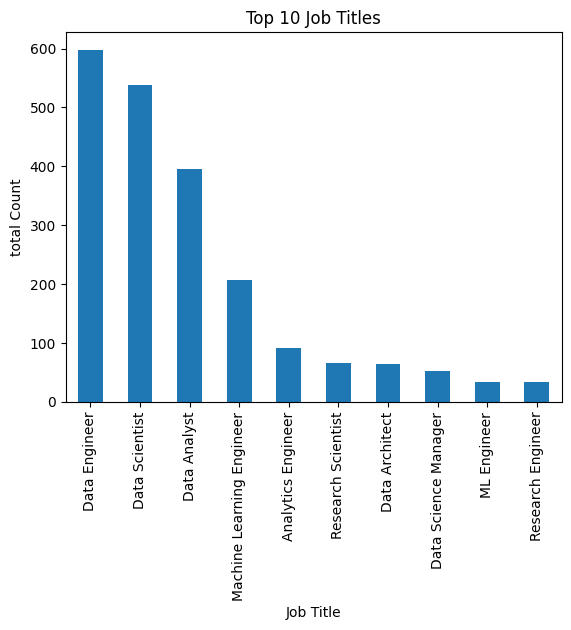

<Figure size 500x300 with 0 Axes>

In [39]:
#Bar plot of top 10 most common job titles using Matplotlib
bar_plot = df['job_title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('total Count')
plt.figure(figsize=(5,3))
plt.show()

In [40]:
#To identify the year with the most job data entries and hirings.
#Plotly library for creating interactive visualizations.
work_year_counts = df['work_year'].value_counts().reset_index()
work_year_counts.columns = ['work_year', 'count']
# Create a pie chart
fig = px.pie(work_year_counts, names='work_year', values='count', title='Yearly Distribution of Job Entries')
fig.update_layout(width=450, height=450)  # Adjust width and height as needed
fig.show()

In [41]:
#Created a new column distinguishing remote vs not remote.
df['remote_category'] = df['remote_ratio'].apply(lambda x: 'Remote' if x == 100 else 'Not Remote')

In [42]:
#The distribution of people working remote vs not remote
df['remote_category'].value_counts().reset_index()

,remote_category,count
0,Not Remote,1373
1,Remote,1211


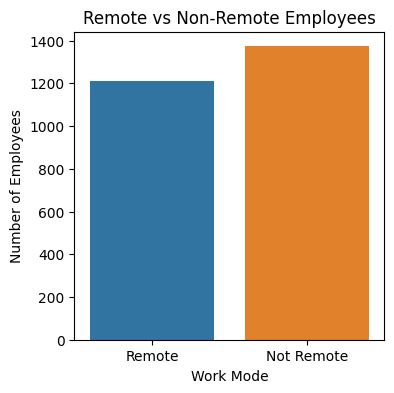

In [43]:
# Used Matplotlib for figure size and Seaborn for countplot visualization
plt.figure(figsize=(4, 4))
sns.countplot(x='remote_category', data=df)
plt.title('Remote vs Non-Remote Employees')
plt.xlabel('Work Mode')
plt.ylabel('Number of Employees')
plt.show()

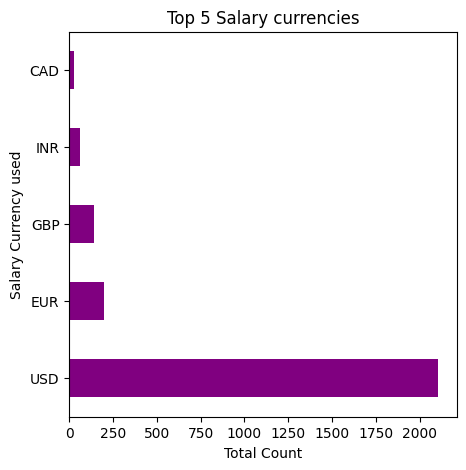

In [44]:
#Displaying the Top % most used salary currencies in matplotlib 
top_currencies = df['salary_currency'].value_counts().head(5)
plt.figure(figsize=(5, 5))
top_currencies.plot(kind='barh', color='purple')
plt.title('Top 5 Salary currencies')
plt.xlabel('Total Count')
plt.ylabel('Salary Currency used')
plt.show()